In [2]:
import pandas as pd

In [3]:
ops=pd.read_csv('/home/bernard/Documents/Data/Open-Power-System-Data/time_series_60min_singleindex.csv',parse_dates=["utc_timestamp","cet_cest_timestamp"],index_col=0)

In [10]:
ops_FR=pd.DataFrame(ops[['cet_cest_timestamp','FR_load_actual_tso']])

In [11]:
ops_FR=ops_FR.dropna(axis=0)

In [16]:
ops_FR

cet_cest_timestamp  FR_load_actual_tso
utc_timestamp                                                           
2011-12-31 23:00:00+00:00  2012-01-01 00:00:00+01:00             58315.0
2012-01-01 00:00:00+00:00  2012-01-01 01:00:00+01:00             56153.0
2012-01-01 01:00:00+00:00  2012-01-01 02:00:00+01:00             55222.0
2012-01-01 02:00:00+00:00  2012-01-01 03:00:00+01:00             51580.0
2012-01-01 03:00:00+00:00  2012-01-01 04:00:00+01:00             48378.0
...                                              ...                 ...
2019-03-31 17:00:00+00:00  2019-03-31 19:00:00+02:00             45197.0
2019-03-31 18:00:00+00:00  2019-03-31 20:00:00+02:00             47964.0
2019-03-31 19:00:00+00:00  2019-03-31 21:00:00+02:00             49701.0
2019-03-31 20:00:00+00:00  2019-03-31 22:00:00+02:00             48538.0
2019-03-31 21:00:00+00:00  2019-03-31 23:00:00+02:00             50987.0

[63527 rows x 2 columns]

In [17]:
X=ops_FR[4:]['FR_load_actual_tso'].copy()

In [28]:
X[:48]

utc_timestamp
2012-01-01 03:00:00+00:00    48378.0
2012-01-01 04:00:00+00:00    46466.0
2012-01-01 05:00:00+00:00    45862.0
2012-01-01 06:00:00+00:00    45608.0
2012-01-01 07:00:00+00:00    45728.0
2012-01-01 08:00:00+00:00    46117.0
2012-01-01 09:00:00+00:00    47848.0
2012-01-01 10:00:00+00:00    49578.0
2012-01-01 11:00:00+00:00    51658.0
2012-01-01 12:00:00+00:00    53036.0
2012-01-01 13:00:00+00:00    50700.0
2012-01-01 14:00:00+00:00    48927.0
2012-01-01 15:00:00+00:00    48304.0
2012-01-01 16:00:00+00:00    50421.0
2012-01-01 17:00:00+00:00    55246.0
2012-01-01 18:00:00+00:00    57560.0
2012-01-01 19:00:00+00:00    57349.0
2012-01-01 20:00:00+00:00    55514.0
2012-01-01 21:00:00+00:00    54119.0
2012-01-01 22:00:00+00:00    56106.0
2012-01-01 23:00:00+00:00    54404.0
2012-01-02 00:00:00+00:00    51123.0
2012-01-02 01:00:00+00:00    50256.0
2012-01-02 02:00:00+00:00    47692.0
2012-01-02 03:00:00+00:00    46300.0
2012-01-02 04:00:00+00:00    47392.0
2012-01-02 05:00:00+00:0

In [23]:
X.size%24

19

In [42]:
X=X[:-(X.size%24)].values.reshape(-1,24)

In [43]:
X.shape

(2646, 24)

In [48]:
from sklearn.decomposition import PCA

In [49]:
pca = PCA(n_components=3)
pca.fit(X)
X_3d = pca.transform(X)

In [53]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D

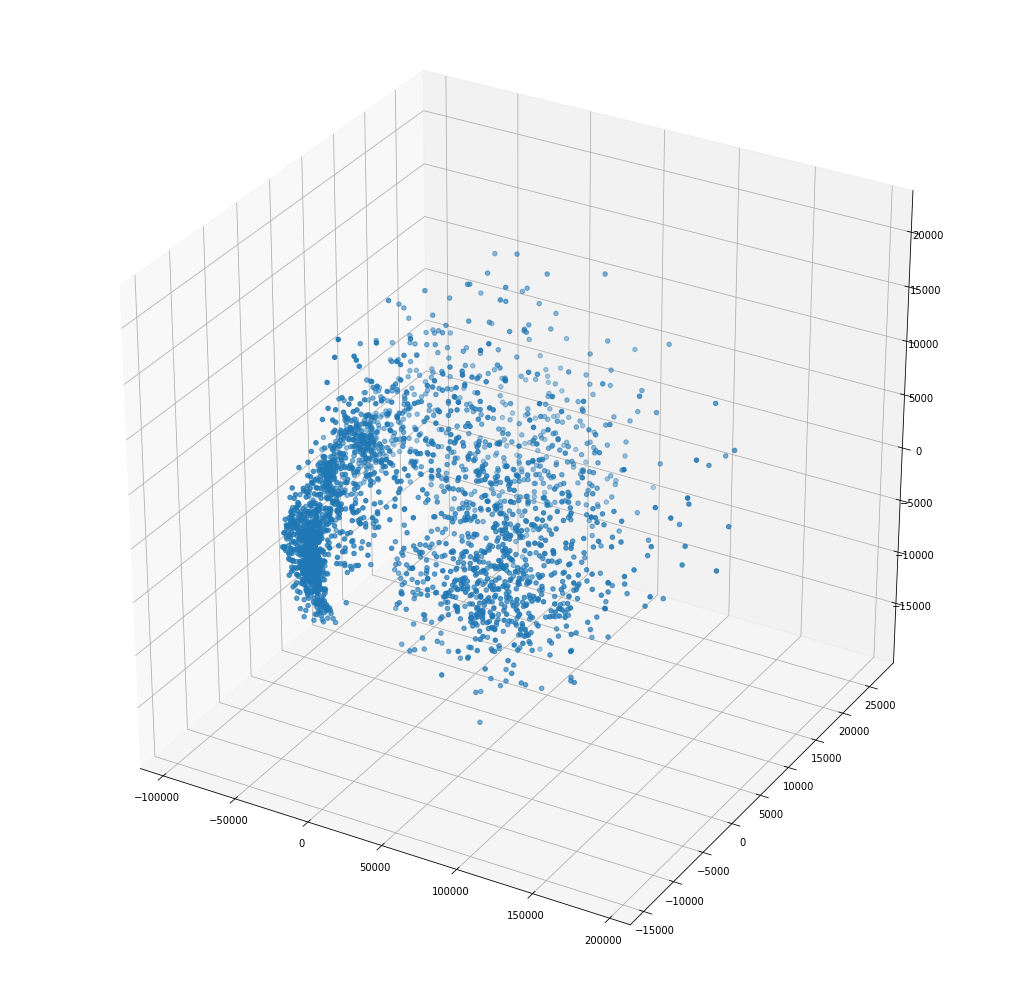

In [54]:
fig = plt.figure(figsize=(18,18))
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:,2], cmap=plt.cm.nipy_spectral)
plt.show()

In [55]:
pca = PCA(n_components=2)
pca.fit(X)
X_2d = pca.transform(X)

In [57]:
import seaborn as sns

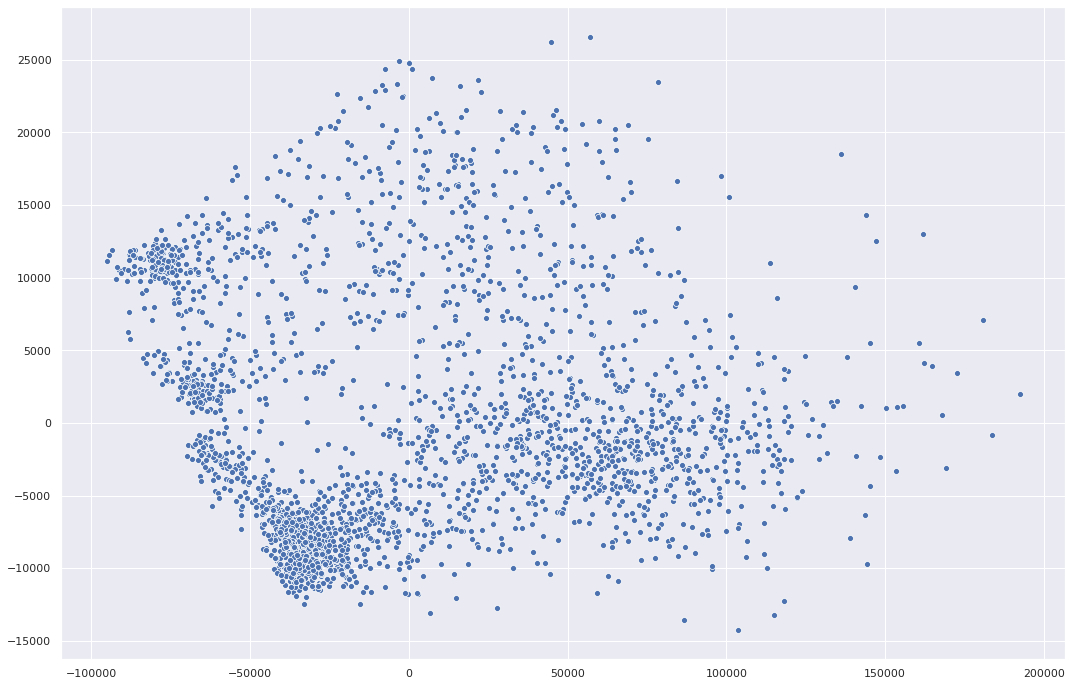

In [58]:
sns.set(rc={'figure.figsize':(18,12)})
#sns.palplot(sns.color_palette("hls", 10))
sns.scatterplot(x=X_2d[:,0], y=X_2d[:,1])

In [60]:
import sklearn.manifold

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2646 samples in 0.011s...
[t-SNE] Computed neighbors for 2646 samples in 0.175s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2646
[t-SNE] Computed conditional probabilities for sample 2000 / 2646
[t-SNE] Computed conditional probabilities for sample 2646 / 2646
[t-SNE] Mean sigma: 1507.888424
[t-SNE] Computed conditional probabilities in 0.336s
[t-SNE] Iteration 50: error = 56.5415649, gradient norm = 0.0006477 (50 iterations in 0.914s)
[t-SNE] Iteration 100: error = 55.7907715, gradient norm = 0.0003713 (50 iterations in 0.843s)
[t-SNE] Iteration 150: error = 55.3384781, gradient norm = 0.0002886 (50 iterations in 0.993s)
[t-SNE] Iteration 200: error = 55.0149727, gradient norm = 0.0002588 (50 iterations in 1.360s)
[t-SNE] Iteration 250: error = 54.7696114, gradient norm = 0.0002618 (50 iterations in 0.841s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.769611
[t-SNE] Iteration 300: 

Text(0.5, 1.0, 'Projection par t-distributed Stochastic Neighbor Embedding')

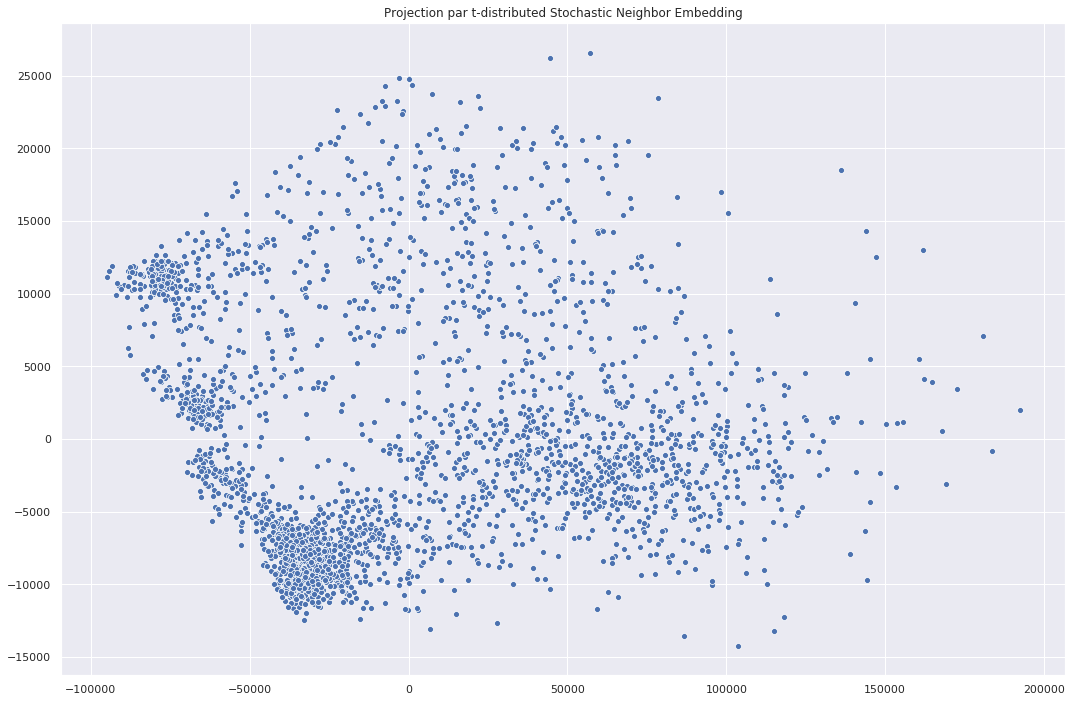

In [64]:
X_2d= sklearn.manifold.TSNE(n_components=2, init='pca',perplexity=50,n_iter_without_progress=500, random_state=0, verbose=3).fit_transform(X)
sns.scatterplot(x=X_2d[:,0], y=X_2d[:,1])
plt.title("Projection par t-distributed Stochastic Neighbor Embedding")

Text(0.5, 1.0, 'Projection par Locally Linear Embedding, method = hessian')

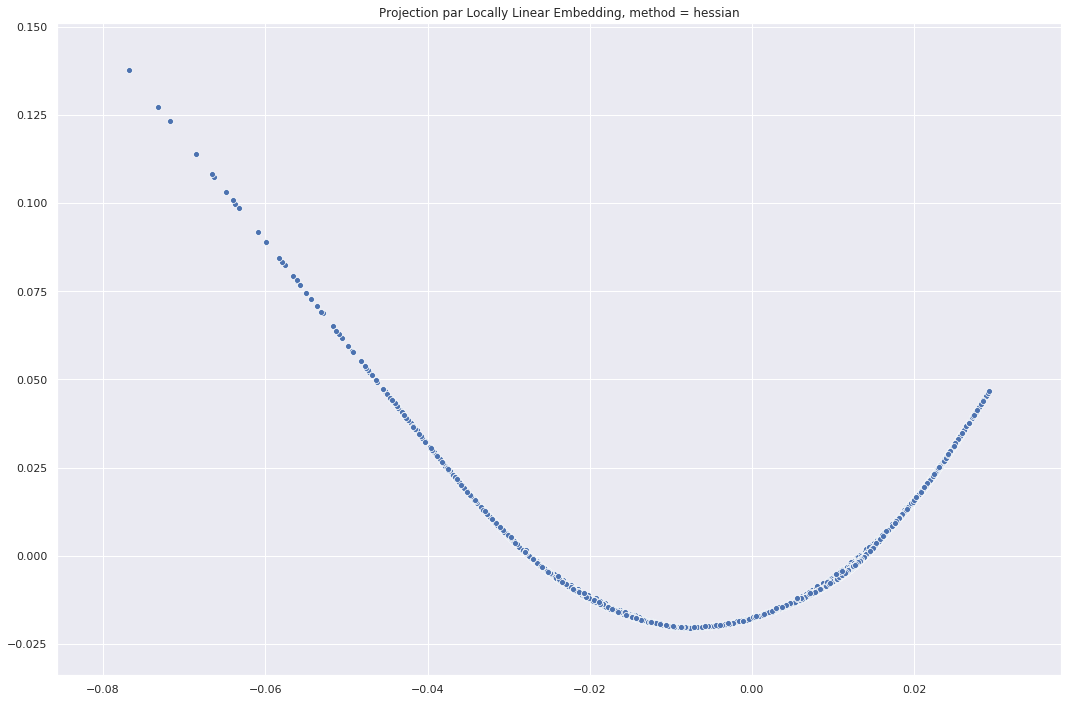

In [69]:
method='hessian'
X_2d = sk.manifold.LocallyLinearEmbedding(n_neighbors=100, n_components=2, method=method).fit_transform(X)
sns.scatterplot(x=X_2d[:,0], y=X_2d[:,1], legend='full')
plt.title("Projection par Locally Linear Embedding, method = {}".format(method))

## 

In [ ]:
ops_FR=ops_FR.rename(columns={'cet_cest_timestamp': 'date','FR_load_actual_tso': 'load_actual', 'FR_load_forecast_tso': 'load_forecast', 'FR_solar_generation_actual':'solar', 'FR_wind_onshore_generation_actual':'wind'})

In [183]:
columns=['pregnancies','glucose', 'blodd_pressure', 'skin_tickness', 'insulin', 'bmi', 'pedigree', 'age','outcome']
diabetes=pd.read_csv("https://gitlab.inria.fr/vrazinin/deep-learning-visualization/raw/master/pima-indians-diabetes.csv",header=None,names=columns, index_col=None)

In [184]:
diabetes

pregnancies  glucose  blodd_pressure  skin_tickness  insulin   bmi  \
0              6      148              72             35        0  33.6   
1              1       85              66             29        0  26.6   
2              8      183              64              0        0  23.3   
3              1       89              66             23       94  28.1   
4              0      137              40             35      168  43.1   
..           ...      ...             ...            ...      ...   ...   
763           10      101              76             48      180  32.9   
764            2      122              70             27        0  36.8   
765            5      121              72             23      112  26.2   
766            1      126              60              0        0  30.1   
767            1       93              70             31        0  30.4   

     pedigree  age  outcome  
0       0.627   50        1  
1       0.351   31        0  
2       0.672   32        1  
3       0.167   21        0  
4       2.288   33        1  
..        ...  ...      ...  
763     0.171   63        0  
764     0.340   27        0  
765     0.245   30        0  
766     0.349   47        1  
767     0.315   23        0  

[768 rows x 9 columns]

In [176]:
(diabetes.loc[:,columns[1:-1]]==0).sum()

pregnancies         5
glucose            35
blodd_pressure    227
skin_tickness     374
insulin            11
bmi                 0
pedigree            0
age               500
dtype: int64

In [177]:
(diabetes[columns[1:-1]]==0).sum()

pregnancies         5
glucose            35
blodd_pressure    227
skin_tickness     374
insulin            11
bmi                 0
pedigree            0
age               500
dtype: int64

In [185]:
import numpy as np
for c in columns[1:-1]:
    diabetes[c].replace(0,np.NaN, inplace=True)
(diabetes[columns[1:-1]]==0).sum()

glucose           0
blodd_pressure    0
skin_tickness     0
insulin           0
bmi               0
pedigree          0
age               0
dtype: int64

In [186]:
diabetes.dropna(inplace=True)
diabetes[columns[1:-1]].isnull().sum()

glucose           0
blodd_pressure    0
skin_tickness     0
insulin           0
bmi               0
pedigree          0
age               0
dtype: int64

In [187]:
diabetes.columns

Index(['pregnancies', 'glucose', 'blodd_pressure', 'skin_tickness', 'insulin',
       'bmi', 'pedigree', 'age', 'outcome'],
      dtype='object')

In [188]:
X=diabetes[diabetes.columns.intersection(columns[:-1])].values
y=diabetes['outcome'].values

In [189]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X)
X= scaler.transform(X)

In [190]:
X

array([[-0.7174265 , -1.09104581, -0.37365481, ..., -0.710421  ,
        -1.03187632, -0.9682991 ],
       [-1.02921274,  0.46631407, -2.45696436, ...,  1.42673006,
         5.11511079,  0.2095853 ],
       [-0.09385402, -1.44794079, -1.65569146, ..., -0.29723846,
        -0.79712575, -0.47751393],
       ...,
       [-0.40564026, -1.12349081, -1.01467313, ..., -0.66767798,
         0.70411863, -0.87014206],
       [ 2.08864966, -0.70170584,  0.42761809, ..., -0.02653266,
        -1.0202837 ,  3.15429628],
       [ 0.52971846, -0.05280589,  0.10710893, ..., -0.9811268 ,
        -0.80582021, -0.0848858 ]])

In [273]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers

def create_basic_model():
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation= 'relu'))
    model.add(Dense(8, activation= 'relu'))
    model.add(Dense(1, activation= 'sigmoid'))
    return model

def create_generic_model(layers):
    model = Sequential()
    prev_layer= 8
    for n,activation in layers:
        model.add(Dense(n, input_dim=prev_layer, activation= activation))
        prev_layer= n
    model.add(Dense(1, activation= 'sigmoid'))
    return model

def create_dropout_model(layers):
    model = Sequential()
    prev_layer= 8
    for n,activation in layers:
        model.add(Dense(n, input_dim=prev_layer, activation= activation))
        if(n==16):
            model.add(Dropout(0.5))
        prev_layer= n
    model.add(Dense(1, activation= 'sigmoid'))
    return model

def create_reg_model(layers):
    model = Sequential()
    prev_layer= 8
    for n,activation in layers:
        model.add(Dense(n, input_dim=prev_layer, activation= activation, kernel_regularizer= regularizers.l2(0.001)))
        model.add(Dropout(0.3))
        prev_layer= n
    model.add(Dense(1, activation= 'sigmoid'))
    return model


model= create_dropout_model([(12,'relu'),(64,'relu'),(8,'relu')])

In [274]:
model.summary()

Model: "sequential_72"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_220 (Dense)            (None, 12)                108       
_________________________________________________________________
dense_221 (Dense)            (None, 64)                832       
_________________________________________________________________
dense_222 (Dense)            (None, 8)                 520       
_________________________________________________________________
dense_223 (Dense)            (None, 1)                 9         
Total params: 1,469
Trainable params: 1,469
Non-trainable params: 0
_________________________________________________________________


[compter le nombre de paramètres](https://towardsdatascience.com/counting-no-of-parameters-in-deep-learning-models-by-hand-8f1716241889)

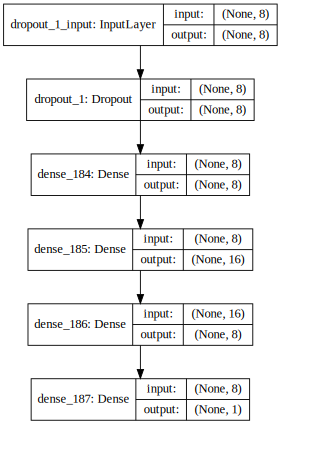

In [225]:
from IPython.display import SVG
from keras.utils import model_to_dot
SVG(model_to_dot(model, show_shapes= True, show_layer_names=True, dpi=65).create(prog='dot', format='svg'))

In [261]:
model.compile(loss= 'binary_crossentropy', optimizer= 'adam' , metrics=['accuracy'])

In [262]:
model.fit(X, y, epochs=150, batch_size=16)

Epoch 1/150
392/392 [==============================] - 3s 8ms/step - loss: 0.6301 - accuracy: 0.6709
Epoch 2/150
392/392 [==============================] - 0s 667us/step - loss: 0.5427 - accuracy: 0.6735
Epoch 3/150
392/392 [==============================] - 0s 576us/step - loss: 0.5056 - accuracy: 0.6786
Epoch 4/150
392/392 [==============================] - 0s 607us/step - loss: 0.4875 - accuracy: 0.7347
Epoch 5/150
392/392 [==============================] - 0s 555us/step - loss: 0.4771 - accuracy: 0.7602
Epoch 6/150
392/392 [==============================] - 0s 516us/step - loss: 0.4683 - accuracy: 0.7781
Epoch 7/150
392/392 [==============================] - 0s 538us/step - loss: 0.4614 - accuracy: 0.7832
Epoch 8/150
392/392 [==============================] - 0s 490us/step - loss: 0.4548 - accuracy: 0.7959
Epoch 9/150
392/392 [==============================] - 0s 615us/step - loss: 0.4493 - accuracy: 0.7959
Epoch 10/150
392/392 [==============================] - 0s 662us/step - los

392/392 [==============================] - 0s 623us/step - loss: 0.2193 - accuracy: 0.9031
Epoch 80/150
392/392 [==============================] - 0s 658us/step - loss: 0.2156 - accuracy: 0.8954
Epoch 81/150
392/392 [==============================] - 0s 722us/step - loss: 0.2161 - accuracy: 0.8980
Epoch 82/150
392/392 [==============================] - 0s 779us/step - loss: 0.2107 - accuracy: 0.9005
Epoch 83/150
392/392 [==============================] - 0s 837us/step - loss: 0.2076 - accuracy: 0.9107
Epoch 84/150
392/392 [==============================] - 0s 764us/step - loss: 0.2061 - accuracy: 0.9056
Epoch 85/150
392/392 [==============================] - 0s 657us/step - loss: 0.2009 - accuracy: 0.9133
Epoch 86/150
392/392 [==============================] - 0s 720us/step - loss: 0.1993 - accuracy: 0.9158
Epoch 87/150
392/392 [==============================] - 0s 547us/step - loss: 0.1976 - accuracy: 0.9107
Epoch 88/150
392/392 [==============================] - 0s 570us/step - loss:

In [263]:
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

392/392 [==============================] - 0s 1ms/step
Accuracy: 98.72


**Exercice :** Relancer les construction du modèle, sa compilation, son entrainement et son évaluation. Est-ce que les résultats sont les mêmes ? Quelles conclusions en tirer ?

**Exercice :** Entrainer le modèle sur un jeu de d'apprentissage et l'évaluer sur un jeu de test.

In [218]:
from sklearn.model_selection import StratifiedShuffleSplit
def evaluate_model(model, X, y, n_epochs=10, n_splits=1):
    histories= []
    sss = StratifiedShuffleSplit(n_splits=n_splits, test_size=0.5, random_state=42)
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        histories.append(model.fit(X_train, y_train, epochs=n_epochs, batch_size=32, validation_data=(X_test, y_test), verbose=0))
    return histories

In [267]:
h= evaluate_model(model,X,y,200)

In [270]:
history= h[0].history
xx=range(1,len(history['loss'])+1)
h[0].history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

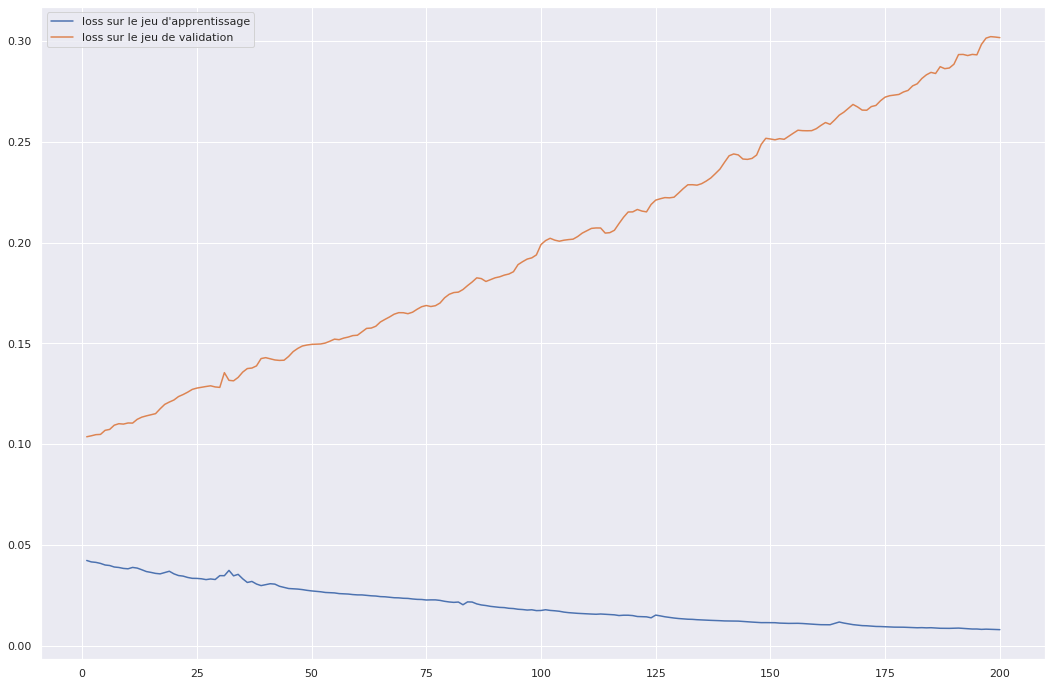

In [271]:
sns.lineplot(x=xx, y=history['loss'])
sns.lineplot(x=xx, y=history['val_loss'])
plt.legend(["loss sur le jeu d'apprentissage", "loss sur le jeu de validation"])

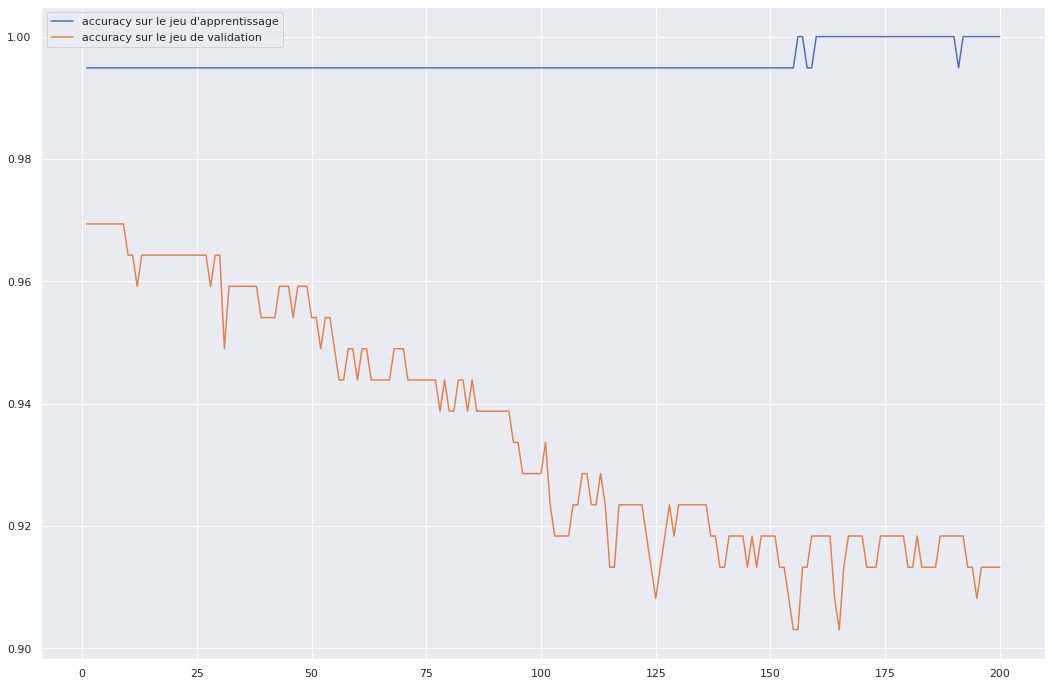

In [272]:
sns.lineplot(x=xx, y=history['accuracy'])
sns.lineplot(x=xx, y=history['val_accuracy'])
plt.legend(["accuracy sur le jeu d'apprentissage", "accuracy sur le jeu de validation"])

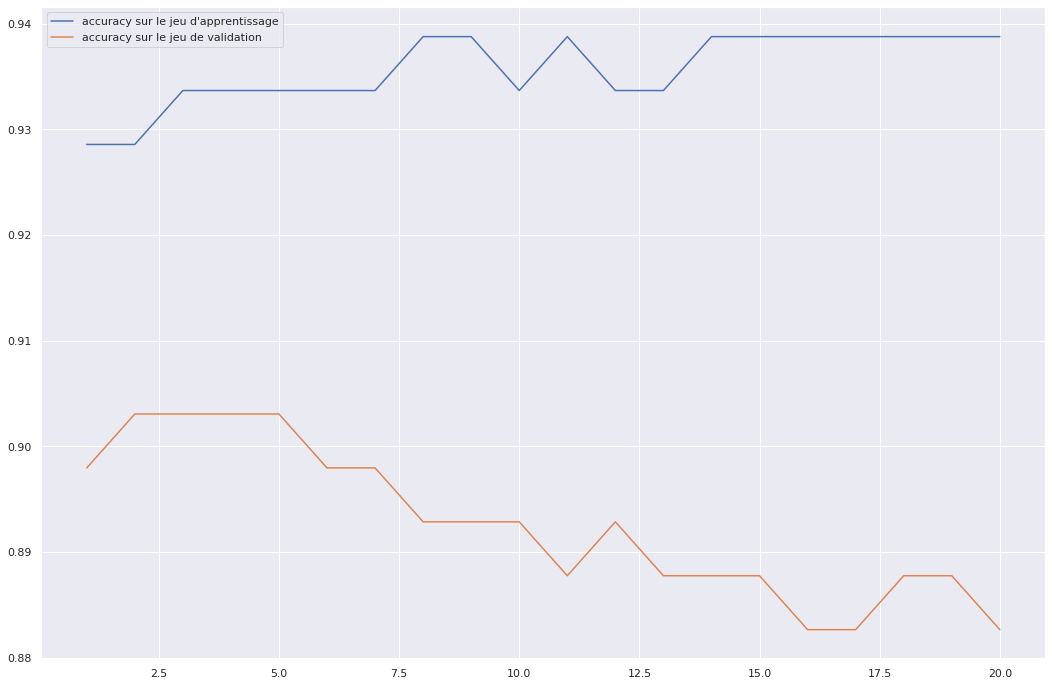

In [222]:
sns.lineplot(x=xx, y=history['accuracy'])
sns.lineplot(x=xx, y=history['val_accuracy'])
plt.legend(["accuracy sur le jeu d'apprentissage", "accuracy sur le jeu de validation"])

**Exercice :** Utiliser l'argument `n_splits` de `evaluate_model` pour visualiser l'intervalle de confiance sur ces indicateurs.

In [201]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

def create_basic_model_and_compile(optimizer= 'rmsprop', init= 'glorot_uniform' ):
    model = Sequential()
    model.add(Dense(12, input_dim=8, activation= 'relu'))
    model.add(Dense(8, activation= 'relu'))
    model.add(Dense(1, activation= 'sigmoid'))
    model.compile(loss= 'binary_crossentropy', optimizer= 'adam' , metrics=['accuracy'])
    return model

model_opt = KerasClassifier(build_fn=create_basic_model_and_compile, verbose=0)
optimizers = ['rmsprop', 'adam']
inits = [ 'glorot_uniform', 'normal', 'uniform']
epochs = [50, 100, 150]
batches = [5, 10, 20]
param_grid = dict(optimizer=optimizers, epochs=epochs, batch_size=batches, init=inits)
grid = GridSearchCV(estimator=model_opt, param_grid=param_grid, cv=3, scoring="accuracy", verbose=1, n_jobs=-1)
grid_result = grid.fit(X, y)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.

KeyboardInterrupt



# Sur apprentissage :

Bcp de données de structure complexe → réseaux complexe pour apprendre la structure mais pb de sur apprentissage
→ drop out (propagation aléatoire)
→ régularisation (pénalisation des poids)
→ augmentation de données (génération de données)
→ arrêt prématuré (*early stopping*)

## Dropout
Generally use a small dropout value of 20%-50% of neurons with 20% providing a good
starting point. A probability too low has minimal effect and a value too high results in
under-learning by the network.
 Use a larger network. You are likely to get better performance when dropout is used
on a larger network, giving the model more of an opportunity to learn independent
representations.
 Use dropout on input (visible) as well as hidden layers. Application of dropout at each
layer of the network has shown good results.
 Use a large learning rate with decay and a large momentum. Increase your learning rate
by a factor of 10 to 100 and use a high momentum value of 0.9 or 0.99.
 Constrain the size of network weights. A large learning rate can result in very large
network weights. Imposing a constraint on the size of network weights such as max-norm
regularization with a size of 4 or 5 has been shown to improve results.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x_train)

In [ ]:
from keras.callbacks import EarlyStopping
earlystop= EarlyStopping(monitor='val_acc', patience=3)# min_delta



https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/


Checkpoint https://machinelearningmastery.com/check-point-deep-learning-models-keras/
Transfert learning

minst digits
fashion minst 
cifa-10

time series 
Project
https://machinelearningmastery.com/how-to-develop-lstm-models-for-multi-step-time-series-forecasting-of-household-power-consumption/